In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [9]:
tickers=[]
i=""
while not i=="done":
    i=input("Enter a ticker, or 'done' if you have finished entering tickers ")
    if not i =="done":
        tickers.append(i)
print(tickers)
data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

Enter a ticker, or 'done' if you have finished entering tickers GE
Enter a ticker, or 'done' if you have finished entering tickers F
Enter a ticker, or 'done' if you have finished entering tickers AAPL
Enter a ticker, or 'done' if you have finished entering tickers MSFT
Enter a ticker, or 'done' if you have finished entering tickers PG
Enter a ticker, or 'done' if you have finished entering tickers done
['GE', 'F', 'AAPL', 'MSFT', 'PG']


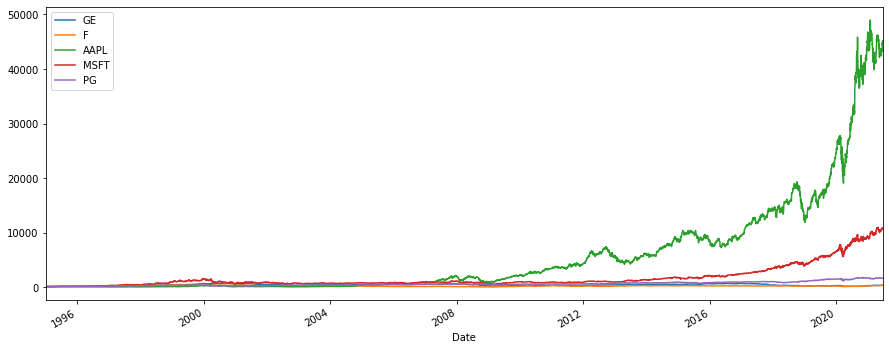

In [10]:
(data/data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [12]:
s=input("Enter a year as YYYY-MM-DD ")
print(data.loc[s])

Enter a year as YYYY-MM-DD 2001-04-17
GE      24.531141
F       16.004045
AAPL     0.313251
MSFT    19.479555
PG      16.576487
Name: 2001-04-17 00:00:00, dtype: float64


In [17]:
weights=[0]*len(tickers)
try:
    for num in range(0, len(tickers)):
        try:
            weights[num]=float(input("Enter weight for {} ".format(tickers[num])))
        except ValueError:
            print("Please enter a number")
    if not sum(weights) ==1:
        raise ValueError("Sum of weights should equal 1")
except ValueError as e:
    print(e)
    

Enter weight for GE 0.2
Enter weight for F 0.2
Enter weight for AAPL 0.2
Enter weight for MSFT 0.2
Enter weight for PG 0.2


In [19]:
weights=np.array(weights)

In [20]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [21]:
returns = (data/data.shift(1))-1

In [24]:
annual_returns=returns.mean()*250
annual_returns

GE      0.095310
F       0.126247
AAPL    0.327252
MSFT    0.225436
PG      0.130320
dtype: float64

In [23]:
pfolio=str(round(np.dot(annual_returns, weights), 5)*100)+"%"
print(pfolio)

18.090999999999998%
